# An Example of ROC Curves on Multiple Methods

In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import sklearn.metrics as met
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [3]:
RANDOM_STATE = 1234
N_SAMPLES = 1000
plt.rcParams["font.size"] = 14

In [4]:
X, y = datasets.make_classification(
    n_samples=N_SAMPLES, n_classes=2, random_state=RANDOM_STATE
)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

clf = SVC(probability=True, random_state=RANDOM_STATE)
clf.fit(X_train, y_train)
prob = clf.predict_proba(X_test)
prob_c1 = prob[:, 1]

In [5]:
fpr1, tpr1, _ = met.roc_curve(y_test, prob_c1)
roc_auc1 = met.auc(fpr1, tpr1)

In [6]:
# Note that the length of this list can be any value within {2, ..., n}
print(fpr1.shape)
print(fpr1)

(24,)
[0.    0.    0.    0.008 0.008 0.016 0.016 0.024 0.024 0.04  0.04  0.056
 0.056 0.08  0.08  0.104 0.104 0.112 0.112 0.344 0.344 0.544 0.544 1.   ]


In [7]:
print(tpr1.shape)
print(tpr1)

(24,)
[0.    0.008 0.392 0.392 0.88  0.88  0.888 0.888 0.904 0.904 0.912 0.912
 0.928 0.928 0.944 0.944 0.968 0.968 0.984 0.984 0.992 0.992 1.    1.   ]


In [8]:
# To simulate another result
fpr2 = np.array([0.0, 0.2, 1.0])
tpr2 = 0.8 * np.ones_like(fpr2)
roc_auc2 = met.auc(fpr2, tpr2)

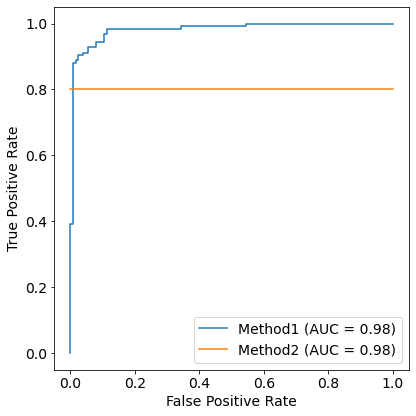

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
met.RocCurveDisplay(
    fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name="Method1"
).plot(ax=ax)
met.RocCurveDisplay(
    fpr=fpr2, tpr=tpr2, roc_auc=roc_auc1, estimator_name="Method2"
).plot(ax=ax)
ax.tick_params(labelsize=14)
plt.tight_layout()
plt.show()